In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Crossvalidation

## KlusterFoldValidation

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

from sklego.model_selection import KlusterFoldValidation

### Create testset

In [15]:
n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=0)


# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
name='GaussianMixture'
algorithm=gmm


algorithm.fit(X)


y_pred = algorithm.predict(X)


### Pass cluster method to KlusterFoldValidation method

In [16]:
cv = KlusterFoldValidation(gmm)

### Clustering

([], &lt;a list of 0 Text major ticklabel objects&gt;)

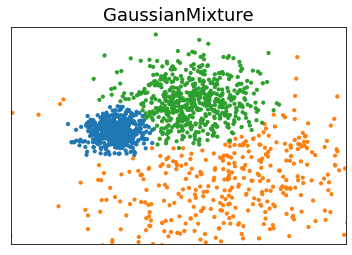

In [17]:
plt.title(name, size=18)

plt.scatter(X[:, 0], X[:, 1], s=10, color=[f'C{i}' for i in y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())


### Clustering based split of the traning set

&lt;matplotlib.legend.Legend at 0x7f529f8d2290&gt;

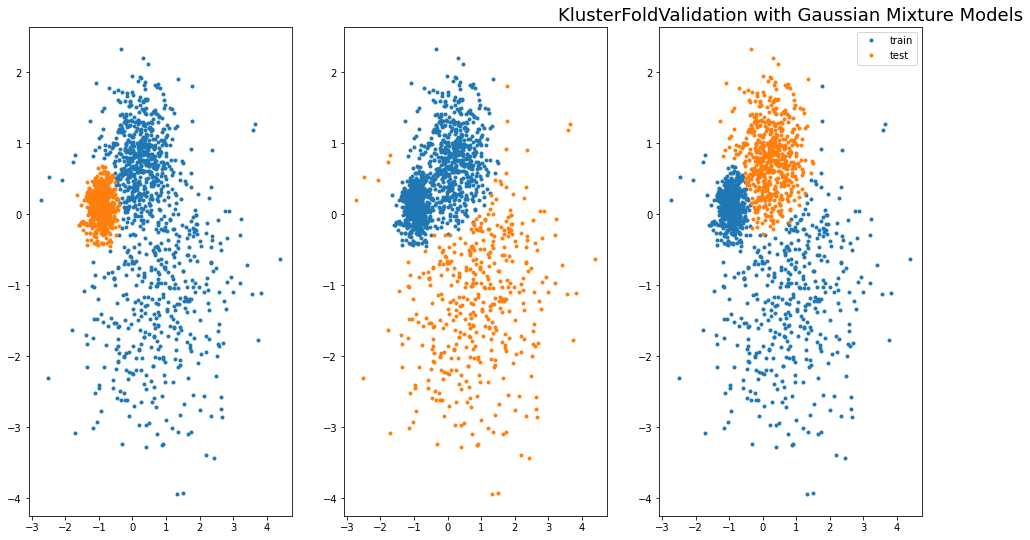

In [18]:
fig, axs =plt.subplots(1,3,figsize=(16,9))
plt.title('KlusterFoldValidation with Gaussian Mixture Models',size=18)
for i,(idx_train,idx_test) in enumerate(cv.split(X)):
    axs[i].plot(X[idx_train,0],X[idx_train,1],'.',color='C0',label='train')
    axs[i].plot(X[idx_test,0],X[idx_test,1],'.',color='C1',label='test')
plt.legend()

